In [1]:
import audio_functions as auf
import read_data as rd
import plot
from custom_dataset import MusicalInstrumentsDataset
import numpy as np

# Musical Instruments Classifier

This project consists in building a neuronal network that classifies a musical instruments based on its sound. A custom dataset has been build from https://www.kaggle.com/datasets/soumendraprasad/musical-instruments-sound-dataset .

## Data

Let's take a look to metadata.

In [2]:
df = rd.read_file("train_data\Metadata_Train.csv")
df.head()

,FileName,Class
0,1-E1-Major 00.wav,Guitar
1,1-E1-Major 01.wav,Guitar
2,1-E1-Major 02.wav,Guitar
3,1-E1-Major 03.wav,Guitar
4,1-E1-Major 04.wav,Guitar


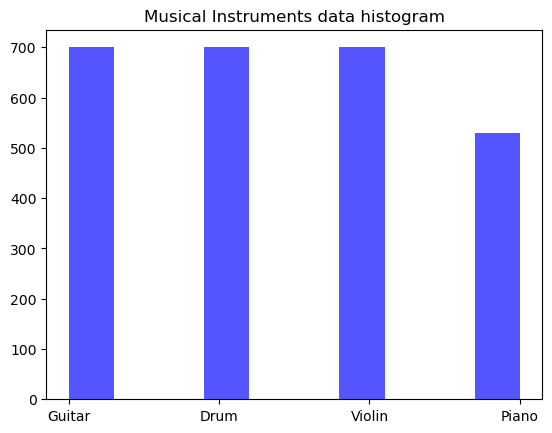

In [3]:
df["Class"]
plot.data_hist(df["Class"], title="Musical Instruments data histogram", show=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  2629 non-null   object
 1   Class     2629 non-null   object
dtypes: object(2)
memory usage: 41.2+ KB


Let's take a look to a random guitar audio.

Audio is already mono


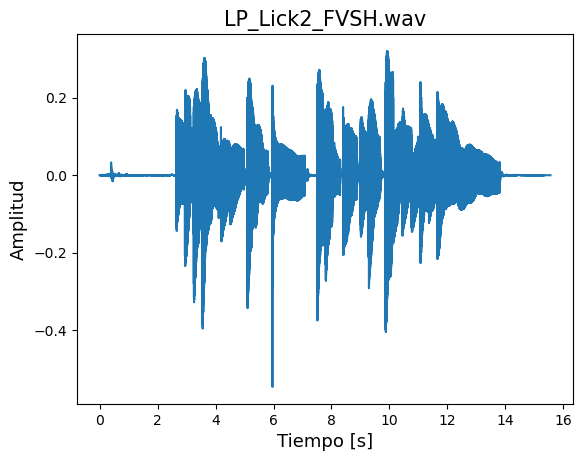

In [5]:
guitar_audios = df["Class"] == "Guitar"
guitar_audios_fn = df.loc[guitar_audios, 'FileName']    #fn stands for file name

rand_index = np.random.randint(0, len(guitar_audios_fn))

rand_audio_fn = guitar_audios_fn[rand_index]


guit_audio, fs = auf.load_audio(f"./train_data/Train Samples/{rand_audio_fn}")
guit_audio = auf.to_mono(guit_audio)

t = auf.generate_time_vector(len(guit_audio)/fs, fs)

plot.plot_signal({"time vector": t, "signal":guit_audio}, title=rand_audio_fn)

We can see that the useful part of data starts after 2 seconds, so we must find a way to detect when does the audio start.